# Email Spam Detection Project

## Step 1: Introduction and Abstract


Email becomes a powerful tool for communication as it saves a lot of time and cost. It is one of the most popular and secure medium for online transferring and communication messages or data through the web. But, due to the social networks, most of the emails contain unwanted information which is called spam. To identify such spam email is one of the important challenges.

In this project we will use PYTHON text classification technique to identify or classify email spam message. We will find accuracy, time and error rate by applying suitable algorithms (such as NaiveBayes, NaiveBayesMultinomial and J48 etc.) on Email Dataset and we will also compare which algorithm is best for text classification.


## Step 2: Data Collection

In [11]:

import pandas as pd

# Load dataset
emails = pd.read_csv('./mail_data.csv')
emails.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Step 3: Pre-processing

In [12]:

import nltk
from nltk.corpus import stopwords
import string




In [13]:
# Download stopwords
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /home/muhammad-
[nltk_data]     rizwan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = "".join([char for char in text if char not in string.punctuation])  # Remove punctuation
    words = text.split()
    stop_words = set(stopwords.words('english'))
    text = " ".join([word for word in words if word not in stop_words])  # Remove stopwords
    return text


In [15]:

# Apply preprocessing
emails['Message'] = emails['Message'].apply(preprocess_text)
emails.head()

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though


## Step 4: Feature Selection

In [17]:

from sklearn.feature_extraction.text import TfidfVectorizer

# Feature extraction
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(emails['Message'])
y = emails['Category']


## Step 5: Apply Spam Filter Algorithms

In [18]:

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import time



In [19]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [20]:
# Function to evaluate model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    return accuracy, training_time, conf_matrix, class_report



In [21]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train.toarray(), y_train)
nb_accuracy, nb_training_time, nb_conf_matrix, nb_class_report = evaluate_model(nb_model, X_train.toarray(), y_train, X_test.toarray(), y_test)



In [22]:
# Multinomial Naive Bayes
mnb_model = MultinomialNB()
mnb_accuracy, mnb_training_time, mnb_conf_matrix, mnb_class_report = evaluate_model(mnb_model, X_train, y_train, X_test, y_test)



In [23]:
# Decision Tree (J48 equivalent)
dt_model = DecisionTreeClassifier()
dt_accuracy, dt_training_time, dt_conf_matrix, dt_class_report = evaluate_model(dt_model, X_train, y_train, X_test, y_test)


## Step 6: Confusion Matrix

In [24]:

# Print Confusion Matrices
print("Naive Bayes Confusion Matrix:\n", nb_conf_matrix)
print("Multinomial Naive Bayes Confusion Matrix:\n", mnb_conf_matrix)
print("Decision Tree Confusion Matrix:\n", dt_conf_matrix)


Naive Bayes Confusion Matrix:
 [[1300  148]
 [  21  203]]
Multinomial Naive Bayes Confusion Matrix:
 [[1448    0]
 [  60  164]]
Decision Tree Confusion Matrix:
 [[1422   26]
 [  44  180]]


## Step 7: Accuracy and Comparison

In [25]:

# Print Accuracy and Training Time
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Training Time:", nb_training_time)
print("Naive Bayes Classification Report:\n", nb_class_report)

print("\nMultinomial Naive Bayes Accuracy:", mnb_accuracy)
print("Multinomial Naive Bayes Training Time:", mnb_training_time)
print("Multinomial Naive Bayes Classification Report:\n", mnb_class_report)

print("\nDecision Tree Accuracy:", dt_accuracy)
print("Decision Tree Training Time:", dt_training_time)
print("Decision Tree Classification Report:\n", dt_class_report)


Naive Bayes Accuracy: 0.8989234449760766
Naive Bayes Training Time: 0.695042610168457
Naive Bayes Classification Report:
               precision    recall  f1-score   support

         ham       0.98      0.90      0.94      1448
        spam       0.58      0.91      0.71       224

    accuracy                           0.90      1672
   macro avg       0.78      0.90      0.82      1672
weighted avg       0.93      0.90      0.91      1672


Multinomial Naive Bayes Accuracy: 0.9641148325358851
Multinomial Naive Bayes Training Time: 0.025051355361938477
Multinomial Naive Bayes Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1448
        spam       1.00      0.73      0.85       224

    accuracy                           0.96      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.97      0.96      0.96      1672


Decision Tree Accuracy: 0.9581339712918661
Decision Tree Trai

## Step 8: Visualize Comparison

In [26]:
import matplotlib.pyplot as plt

# Data for plotting
algorithms = ['Naive Bayes', 'Multinomial Naive Bayes', 'Decision Tree']
accuracies = [nb_accuracy, mnb_accuracy, dt_accuracy]
training_times = [nb_training_time, mnb_training_time, dt_training_time]




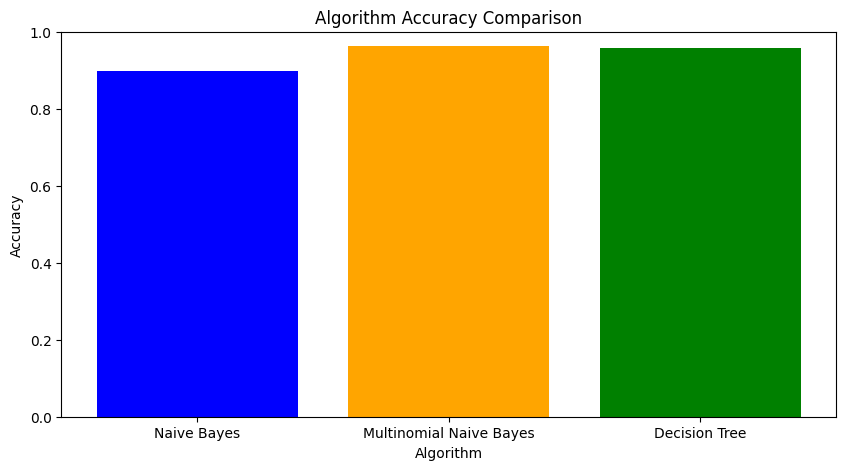

In [27]:
# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.bar(algorithms, accuracies, color=['blue', 'orange', 'green'])
plt.title('Algorithm Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


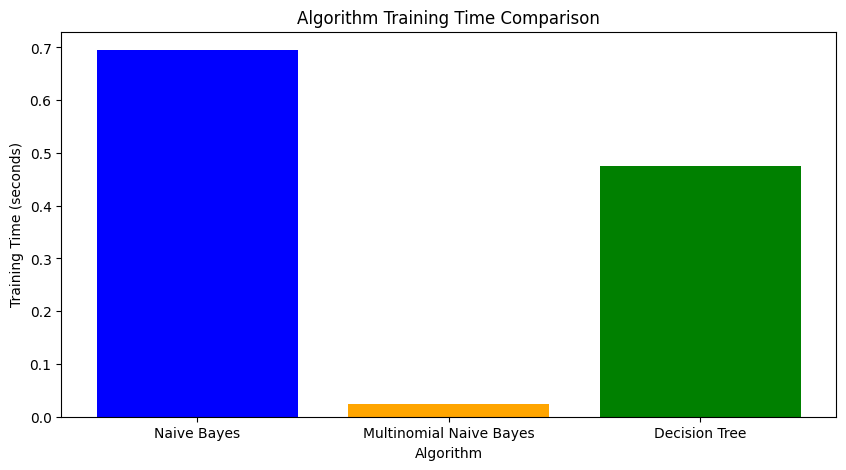

In [28]:

# Plot Training Time
plt.figure(figsize=(10, 5))
plt.bar(algorithms, training_times, color=['blue', 'orange', 'green'])
plt.title('Algorithm Training Time Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Training Time (seconds)')
plt.show()

## Step 9: Suggest the Suitable Algorithm

In [30]:
# Suggest the suitable algorithm based on accuracy and training time
best_algorithm = algorithms[accuracies.index(max(accuracies))]
print(f"The most suitable algorithm based on accuracy is: {best_algorithm}")


The most suitable algorithm based on accuracy is: Multinomial Naive Bayes


## Step 10: Save the Model

In [34]:
import joblib
joblib.dump(mnb_model, 'multinomial_naive_bayes_model.pkl')
print("The Multinomial Naive Bayes model has been saved successfully")


The Multinomial Naive Bayes model has been saved successfully


In [37]:
import joblib

# Save the vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [39]:
vectorizer = joblib.load('tfidf_vectorizer.pkl')  # Make sure to save and load the vectorizer as well
vectorizer

TfidfVectorizer()

## Step 11: Load the Model and Test a New Email

In [35]:
import joblib
import numpy as np
import nltk
from nltk.corpus import stopwords
import string

# Load the best model

loaded_model = joblib.load('multinomial_naive_bayes_model.pkl')


# Preprocess the new email
def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = "".join([char for char in text if char not in string.punctuation])  # Remove punctuation
    words = text.split()
    stop_words = set(stopwords.words('english'))
    text = " ".join([word for word in words if word not in stop_words])  # Remove stopwords
    return text

# Sample email to test
new_email = "Congratulations! You've won a $1000 gift card. Click here to claim your prize."
preprocessed_email = preprocess_text(new_email)

# Transform the email
vectorized_email = vectorizer.transform([preprocessed_email])

# Predict using the loaded model
prediction = loaded_model.predict(vectorized_email)

# Interpret the prediction
if prediction[0] == 1:
    print("The email is classified as Spam.")
else:
    print("The email is classified as Ham (Not Spam).")


The email is classified as Ham (Not Spam).
